In [1]:
import numpy as np
import anndata
import pandas as pd
import scanpy as sc
import scipy
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Data was downloaded from https://depmap.org/portal/download/all/?releasename=Proteomics&filename=protein_quant_current_normalized.csv

In [3]:
# Imputation strategies:
# ALS, kNN, half_min, lower_normal, 0

In [4]:
Path='/home/mgander/Atlantic/data/'

In [5]:
df=pd.read_csv(f'{Path}Additionals/protein_quant_current_normalized.csv')
df

,Protein_Id,Gene_Symbol,Description,Group_ID,Uniprot,Uniprot_Acc,TenPx01_Peptides,TenPx02_Peptides,TenPx03_Peptides,TenPx04_Peptides,...,NCIH2030_LUNG_TenPx18,22RV1_PROSTATE_TenPx24,A172_CENTRAL_NERVOUS_SYSTEM_TenPx24,BT20_BREAST_TenPx24,CALU6_LUNG_TenPx24,FADU_UPPER_AERODIGESTIVE_TRACT_TenPx24,KP4_PANCREAS_TenPx24,MONOMAC6_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_TenPx24,OVCAR8_OVARY_TenPx24,THP1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_TenPx24
0,sp|P55011|S12A2_HUMAN,SLC12A2,S12A2_HUMAN Solute carrier family 12 member 2,0,S12A2_HUMAN,P55011,41,16,23,59,...,-1.345024,1.811205,-0.921176,-1.045727,0.845574,-0.071063,0.702306,-1.395878,-1.165032,-0.547536
1,sp|P35453|HXD13_HUMAN,HOXD13,HXD13_HUMAN Homeobox protein Hox-D13,1,HXD13_HUMAN,P35453,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sp|O60341|KDM1A_HUMAN,KDM1A,KDM1A_HUMAN Lysine-specific histone demethylas...,2,KDM1A_HUMAN,O60341,25,35,37,40,...,0.161196,-0.337994,-0.455601,0.392393,0.258380,-0.817245,-0.790010,0.929522,-0.828736,0.735431
3,sp|O00570|SOX1_HUMAN,SOX1,SOX1_HUMAN Transcription factor SOX-1,4,SOX1_HUMAN,O00570,0,0,1,0,...,-0.040198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sp|P48431|SOX2_HUMAN,SOX2,SOX2_HUMAN Transcription factor SOX-2,4,SOX2_HUMAN,P48431,1,0,2,1,...,-4.627606,-1.261703,1.136851,-3.179027,1.424570,2.549687,4.424095,-1.083698,-1.640990,-2.905547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12750,sp|Q9Y258|CCL26_HUMAN,CCL26,CCL26_HUMAN C-C motif chemokine 26,23903,CCL26_HUMAN,Q9Y258,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12751,sp|P20292|AL5AP_HUMAN,ALOX5AP,AL5AP_HUMAN Arachidonate 5-lipoxygenase-activa...,24093,AL5AP_HUMAN,P20292,0,0,0,0,...,NaN,-0.690046,-1.600231,-1.110583,-1.047633,0.023850,-1.393552,4.556818,-0.531699,0.640295
12752,sp|Q9H1C7|CYTM1_HUMAN,CYSTM1,CYTM1_HUMAN Cysteine-rich and transmembrane do...,24337,CYTM1_HUMAN,Q9H1C7,3,1,1,1,...,-0.393738,0.604400,1.643414,-1.481004,0.408420,-0.177391,0.445977,-2.497558,0.964551,-2.004067
12753,sp|Q99735|MGST2_HUMAN,MGST2,MGST2_HUMAN Microsomal glutathione S-transfera...,24878,MGST2_HUMAN,Q99735,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.index=df['Protein_Id']
df=df.iloc[:,48:].copy()
df

,MDAMB468_BREAST_TenPx01,SH4_SKIN_TenPx01,AU565_BREAST_TenPx01,KMRC1_KIDNEY_TenPx01,CAL51_BREAST_TenPx01,RPMI7951_SKIN_TenPx01,RERFLCMS_LUNG_TenPx01,IGR37_SKIN_TenPx01,VMRCRCW_KIDNEY_TenPx01,HEP3B217_LIVER_TenPx02,...,NCIH2030_LUNG_TenPx18,22RV1_PROSTATE_TenPx24,A172_CENTRAL_NERVOUS_SYSTEM_TenPx24,BT20_BREAST_TenPx24,CALU6_LUNG_TenPx24,FADU_UPPER_AERODIGESTIVE_TRACT_TenPx24,KP4_PANCREAS_TenPx24,MONOMAC6_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_TenPx24,OVCAR8_OVARY_TenPx24,THP1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_TenPx24
Protein_Id,,,,,,,,,,,,,,,,,,,,,
sp|P55011|S12A2_HUMAN,2.111348,0.070468,-0.463928,-0.883645,0.788565,-0.912352,0.729167,-0.658213,-1.150653,0.008824,...,-1.345024,1.811205,-0.921176,-1.045727,0.845574,-0.071063,0.702306,-1.395878,-1.165032,-0.547536
sp|P35453|HXD13_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sp|O60341|KDM1A_HUMAN,0.379683,-0.283538,0.191211,-0.595606,0.391243,-0.381329,0.410168,0.066076,-0.324100,0.316569,...,0.161196,-0.337994,-0.455601,0.392393,0.258380,-0.817245,-0.790010,0.929522,-0.828736,0.735431
sp|O00570|SOX1_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.040198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sp|P48431|SOX2_HUMAN,-0.246367,-0.572753,-0.341305,-0.335211,-0.124474,0.043893,1.882953,-0.616307,-0.533335,NaN,...,-4.627606,-1.261703,1.136851,-3.179027,1.424570,2.549687,4.424095,-1.083698,-1.640990,-2.905547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sp|Q9Y258|CCL26_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sp|P20292|AL5AP_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.690046,-1.600231,-1.110583,-1.047633,0.023850,-1.393552,4.556818,-0.531699,0.640295
sp|Q9H1C7|CYTM1_HUMAN,-0.313512,0.105086,-0.586815,-0.132940,0.452423,-0.546389,0.298349,0.461098,0.309062,0.017985,...,-0.393738,0.604400,1.643414,-1.481004,0.408420,-0.177391,0.445977,-2.497558,0.964551,-2.004067


# Map to cellosaurus

In [7]:
def purge_and_capitalize(ccl):
    ccl_str=ccl.replace('-', '')
    ccl_str=ccl_str.replace(' ', '')
    return(ccl_str.upper())

def map_celllines_to_cellosaurus(ccls):
    # Let's remove '-' and spaces and capitalize everything
    D_ccl={}

    for ccl in ccls:
        D_ccl[ccl]=purge_and_capitalize(ccl)
    ccl_red=sorted(set([D_ccl[a] for a in ccls]))
    len(ccl_red)
    
    Path='/home/mgander/Atlantic/data/'
    dfc=pd.read_pickle(f'{Path}/Viability/CCL_dict/Cellosaurus_CCLs.pkl')
    dfc=dfc[dfc['Species']=='NCBI_TaxID=9606; ! Homo sapiens (Human)']

    # Use the synonyms to map to the Cellosaurus ID
    cellosaurus_ids=list(dfc['Cellosaurus_ID'])
    syns=list(dfc['Synonyms'])

    syn_l=[]
    for s in syns:
        if '; ' in s:
            syn_l.append(s.split('; '))
        else:
            syn_l.append(s)
    D_cello={cellosaurus_ids[i]:cellosaurus_ids[i] for i in range(len(cellosaurus_ids))}

    for i in range(len(syn_l)):
        for s in syn_l[i]:
            D_cello[s]=cellosaurus_ids[i]
            
    ccl_red=sorted(set(ccl_red))
    for ccl in ccl_red:
        if ccl in cellosaurus_ids:
            D_cello[ccl]=ccl
            
    D_cello['C106']='C106[HUMANRECTALADENOCARCINOMA]'
    D_cello['CC20']='CC20[HUMANCOLONADENOCARCINOMA]'
    D_cello['NCIADRES']='NCIADRRES'
    D_cello['Hela']='HELA'
    
    D_cello['L33']='L3.3'
    
    keys=list(D_cello.keys())
    # Still missing
    for ccl_red in ccl_red:
        if not ccl_red in keys:
            print(f'{ccl_red}')
    #return([D_ccl[a] for a in ccls])
    
    return([D_cello[D_ccl[a]] for a in ccls])

In [8]:
ccls=[a.split('_')[0] for a in df.columns]

In [9]:
ccl_type=[a.split('_')[1] for a in df.columns if '_' in a]

In [10]:
ccls=map_celllines_to_cellosaurus(ccls)

In [11]:
df.columns=ccls

In [12]:
df

,MDAMB468,SH4,AU565,KMRC1,CAL51,RPMI7951,RERFLCMS,IGR37,VMRCRCW,HEP3B2.17,...,NCIH2030,22RV1,A172,BT20,CALU6,FADU,KP4,MONOMAC6,OVCAR8,THP1
Protein_Id,,,,,,,,,,,,,,,,,,,,,
sp|P55011|S12A2_HUMAN,2.111348,0.070468,-0.463928,-0.883645,0.788565,-0.912352,0.729167,-0.658213,-1.150653,0.008824,...,-1.345024,1.811205,-0.921176,-1.045727,0.845574,-0.071063,0.702306,-1.395878,-1.165032,-0.547536
sp|P35453|HXD13_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sp|O60341|KDM1A_HUMAN,0.379683,-0.283538,0.191211,-0.595606,0.391243,-0.381329,0.410168,0.066076,-0.324100,0.316569,...,0.161196,-0.337994,-0.455601,0.392393,0.258380,-0.817245,-0.790010,0.929522,-0.828736,0.735431
sp|O00570|SOX1_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.040198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sp|P48431|SOX2_HUMAN,-0.246367,-0.572753,-0.341305,-0.335211,-0.124474,0.043893,1.882953,-0.616307,-0.533335,NaN,...,-4.627606,-1.261703,1.136851,-3.179027,1.424570,2.549687,4.424095,-1.083698,-1.640990,-2.905547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sp|Q9Y258|CCL26_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sp|P20292|AL5AP_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.690046,-1.600231,-1.110583,-1.047633,0.023850,-1.393552,4.556818,-0.531699,0.640295
sp|Q9H1C7|CYTM1_HUMAN,-0.313512,0.105086,-0.586815,-0.132940,0.452423,-0.546389,0.298349,0.461098,0.309062,0.017985,...,-0.393738,0.604400,1.643414,-1.481004,0.408420,-0.177391,0.445977,-2.497558,0.964551,-2.004067


In [13]:
# Filter out proteins that are there only sparsly
#f_cut=0.5
#prots_kept=(np.isfinite(df).sum(1)>f_cut*df.shape[1])
#prots_kept=list(prots_kept[prots_kept].index)
#df=df.loc[prots_kept].copy()
#df

In [16]:
df=df.loc[prots_kept].copy()
df

,MDAMB468,SH4,AU565,KMRC1,CAL51,RPMI7951,RERFLCMS,IGR37,VMRCRCW,HEP3B2.17,...,NCIH2030,22RV1,A172,BT20,CALU6,FADU,KP4,MONOMAC6,OVCAR8,THP1
Protein_Id,,,,,,,,,,,,,,,,,,,,,
sp|P55011|S12A2_HUMAN,2.111348,0.070468,-0.463928,-0.883645,0.788565,-0.912352,0.729167,-0.658213,-1.150653,0.008824,...,-1.345024,1.811205,-0.921176,-1.045727,0.845574,-0.071063,0.702306,-1.395878,-1.165032,-0.547536
sp|O60341|KDM1A_HUMAN,0.379683,-0.283538,0.191211,-0.595606,0.391243,-0.381329,0.410168,0.066076,-0.324100,0.316569,...,0.161196,-0.337994,-0.455601,0.392393,0.258380,-0.817245,-0.790010,0.929522,-0.828736,0.735431
sp|P48431|SOX2_HUMAN,-0.246367,-0.572753,-0.341305,-0.335211,-0.124474,0.043893,1.882953,-0.616307,-0.533335,NaN,...,-4.627606,-1.261703,1.136851,-3.179027,1.424570,2.549687,4.424095,-1.083698,-1.640990,-2.905547
sp|P37108|SRP14_HUMAN,-0.186838,0.197277,-0.409423,-0.070153,0.766739,-0.211540,-0.397926,0.522584,-0.485394,0.797195,...,0.450496,0.543850,0.063200,-0.127283,0.452679,0.119898,-1.139911,-0.029949,-0.686840,0.705971
sp|Q8N697|S15A4_HUMAN,-0.217472,0.095354,-0.121464,0.740597,0.035343,-0.215569,-0.162534,0.113414,-0.128188,-0.131508,...,0.359035,-0.725207,0.704006,-0.496857,0.086311,-0.730393,0.044828,0.283795,0.139091,-0.347709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sp|Q8TBQ9|KISHA_HUMAN,-0.018582,0.287234,-0.231386,0.010742,0.353924,0.049599,-0.295069,0.143981,-0.548447,NaN,...,-0.329877,-0.659333,-0.234201,-0.413939,-0.144278,-0.090848,-0.536559,0.480190,-0.951603,1.011594
sp|P03891|NU2M_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sp|P03897|NU3M_HUMAN,0.433789,-0.149629,-0.376248,-0.915686,0.793730,-0.302253,0.384985,0.945455,-0.533772,-0.453702,...,-0.138941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.to_pickle('Gigy_with_nans.pkl')

In [20]:
df=half_min_imputation(df)

/tmp/ipykernel_13237/590714121.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  M0.iloc[i,j]=mins[i]


In [21]:
# df=z_transform(df)

In [22]:
df

,MDAMB468,SH4,AU565,KMRC1,CAL51,RPMI7951,RERFLCMS,IGR37,VMRCRCW,HEP3B2.17,...,NCIH2030,22RV1,A172,BT20,CALU6,FADU,KP4,MONOMAC6,OVCAR8,THP1
Protein_Id,,,,,,,,,,,,,,,,,,,,,
sp|P55011|S12A2_HUMAN,2.111348,0.070468,-0.463928,-0.883645,0.788565,-0.912352,0.729167,-0.658213,-1.150653,0.008824,...,-1.345024,1.811205,-0.921176,-1.045727,0.845574,-0.071063,0.702306,-1.395878,-1.165032,-0.547536
sp|O60341|KDM1A_HUMAN,0.379683,-0.283538,0.191211,-0.595606,0.391243,-0.381329,0.410168,0.066076,-0.324100,0.316569,...,0.161196,-0.337994,-0.455601,0.392393,0.258380,-0.817245,-0.790010,0.929522,-0.828736,0.735431
sp|P48431|SOX2_HUMAN,-0.246367,-0.572753,-0.341305,-0.335211,-0.124474,0.043893,1.882953,-0.616307,-0.533335,-6.770164,...,-4.627606,-1.261703,1.136851,-3.179027,1.424570,2.549687,4.424095,-1.083698,-1.640990,-2.905547
sp|P37108|SRP14_HUMAN,-0.186838,0.197277,-0.409423,-0.070153,0.766739,-0.211540,-0.397926,0.522584,-0.485394,0.797195,...,0.450496,0.543850,0.063200,-0.127283,0.452679,0.119898,-1.139911,-0.029949,-0.686840,0.705971
sp|Q8N697|S15A4_HUMAN,-0.217472,0.095354,-0.121464,0.740597,0.035343,-0.215569,-0.162534,0.113414,-0.128188,-0.131508,...,0.359035,-0.725207,0.704006,-0.496857,0.086311,-0.730393,0.044828,0.283795,0.139091,-0.347709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sp|Q8TBQ9|KISHA_HUMAN,-0.018582,0.287234,-0.231386,0.010742,0.353924,0.049599,-0.295069,0.143981,-0.548447,-0.919617,...,-0.329877,-0.659333,-0.234201,-0.413939,-0.144278,-0.090848,-0.536559,0.480190,-0.951603,1.011594
sp|P03891|NU2M_HUMAN,-2.481046,-2.481046,-2.481046,-2.481046,-2.481046,-2.481046,-2.481046,-2.481046,-2.481046,-2.481046,...,-2.481046,-2.481046,-2.481046,-2.481046,-2.481046,-2.481046,-2.481046,-2.481046,-2.481046,-2.481046
sp|P03897|NU3M_HUMAN,0.433789,-0.149629,-0.376248,-0.915686,0.793730,-0.302253,0.384985,0.945455,-0.533772,-0.453702,...,-0.138941,-1.375624,-1.375624,-1.375624,-1.375624,-1.375624,-1.375624,-1.375624,-1.375624,-1.375624


<Axes: ylabel='Protein_Id'>

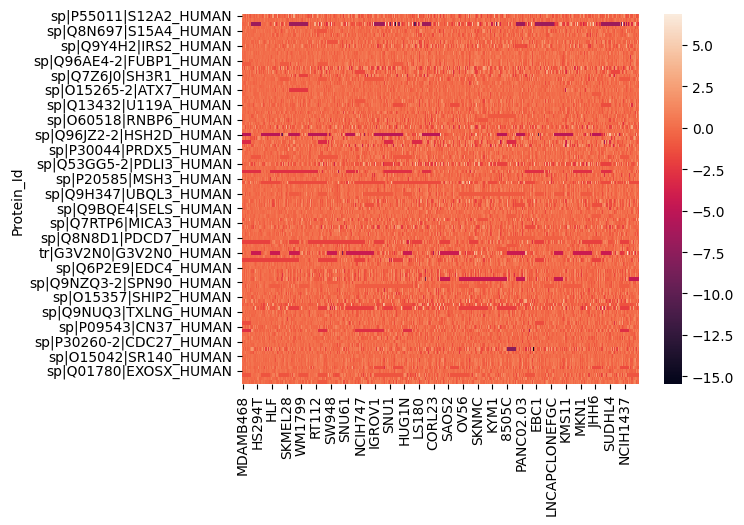

In [23]:
sns.heatmap(df.iloc[:100])

In [24]:
# A quick PCA

In [25]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 300

In [26]:
dfcopy=df.copy()

Text(0, 0.5, 'PCA 2')

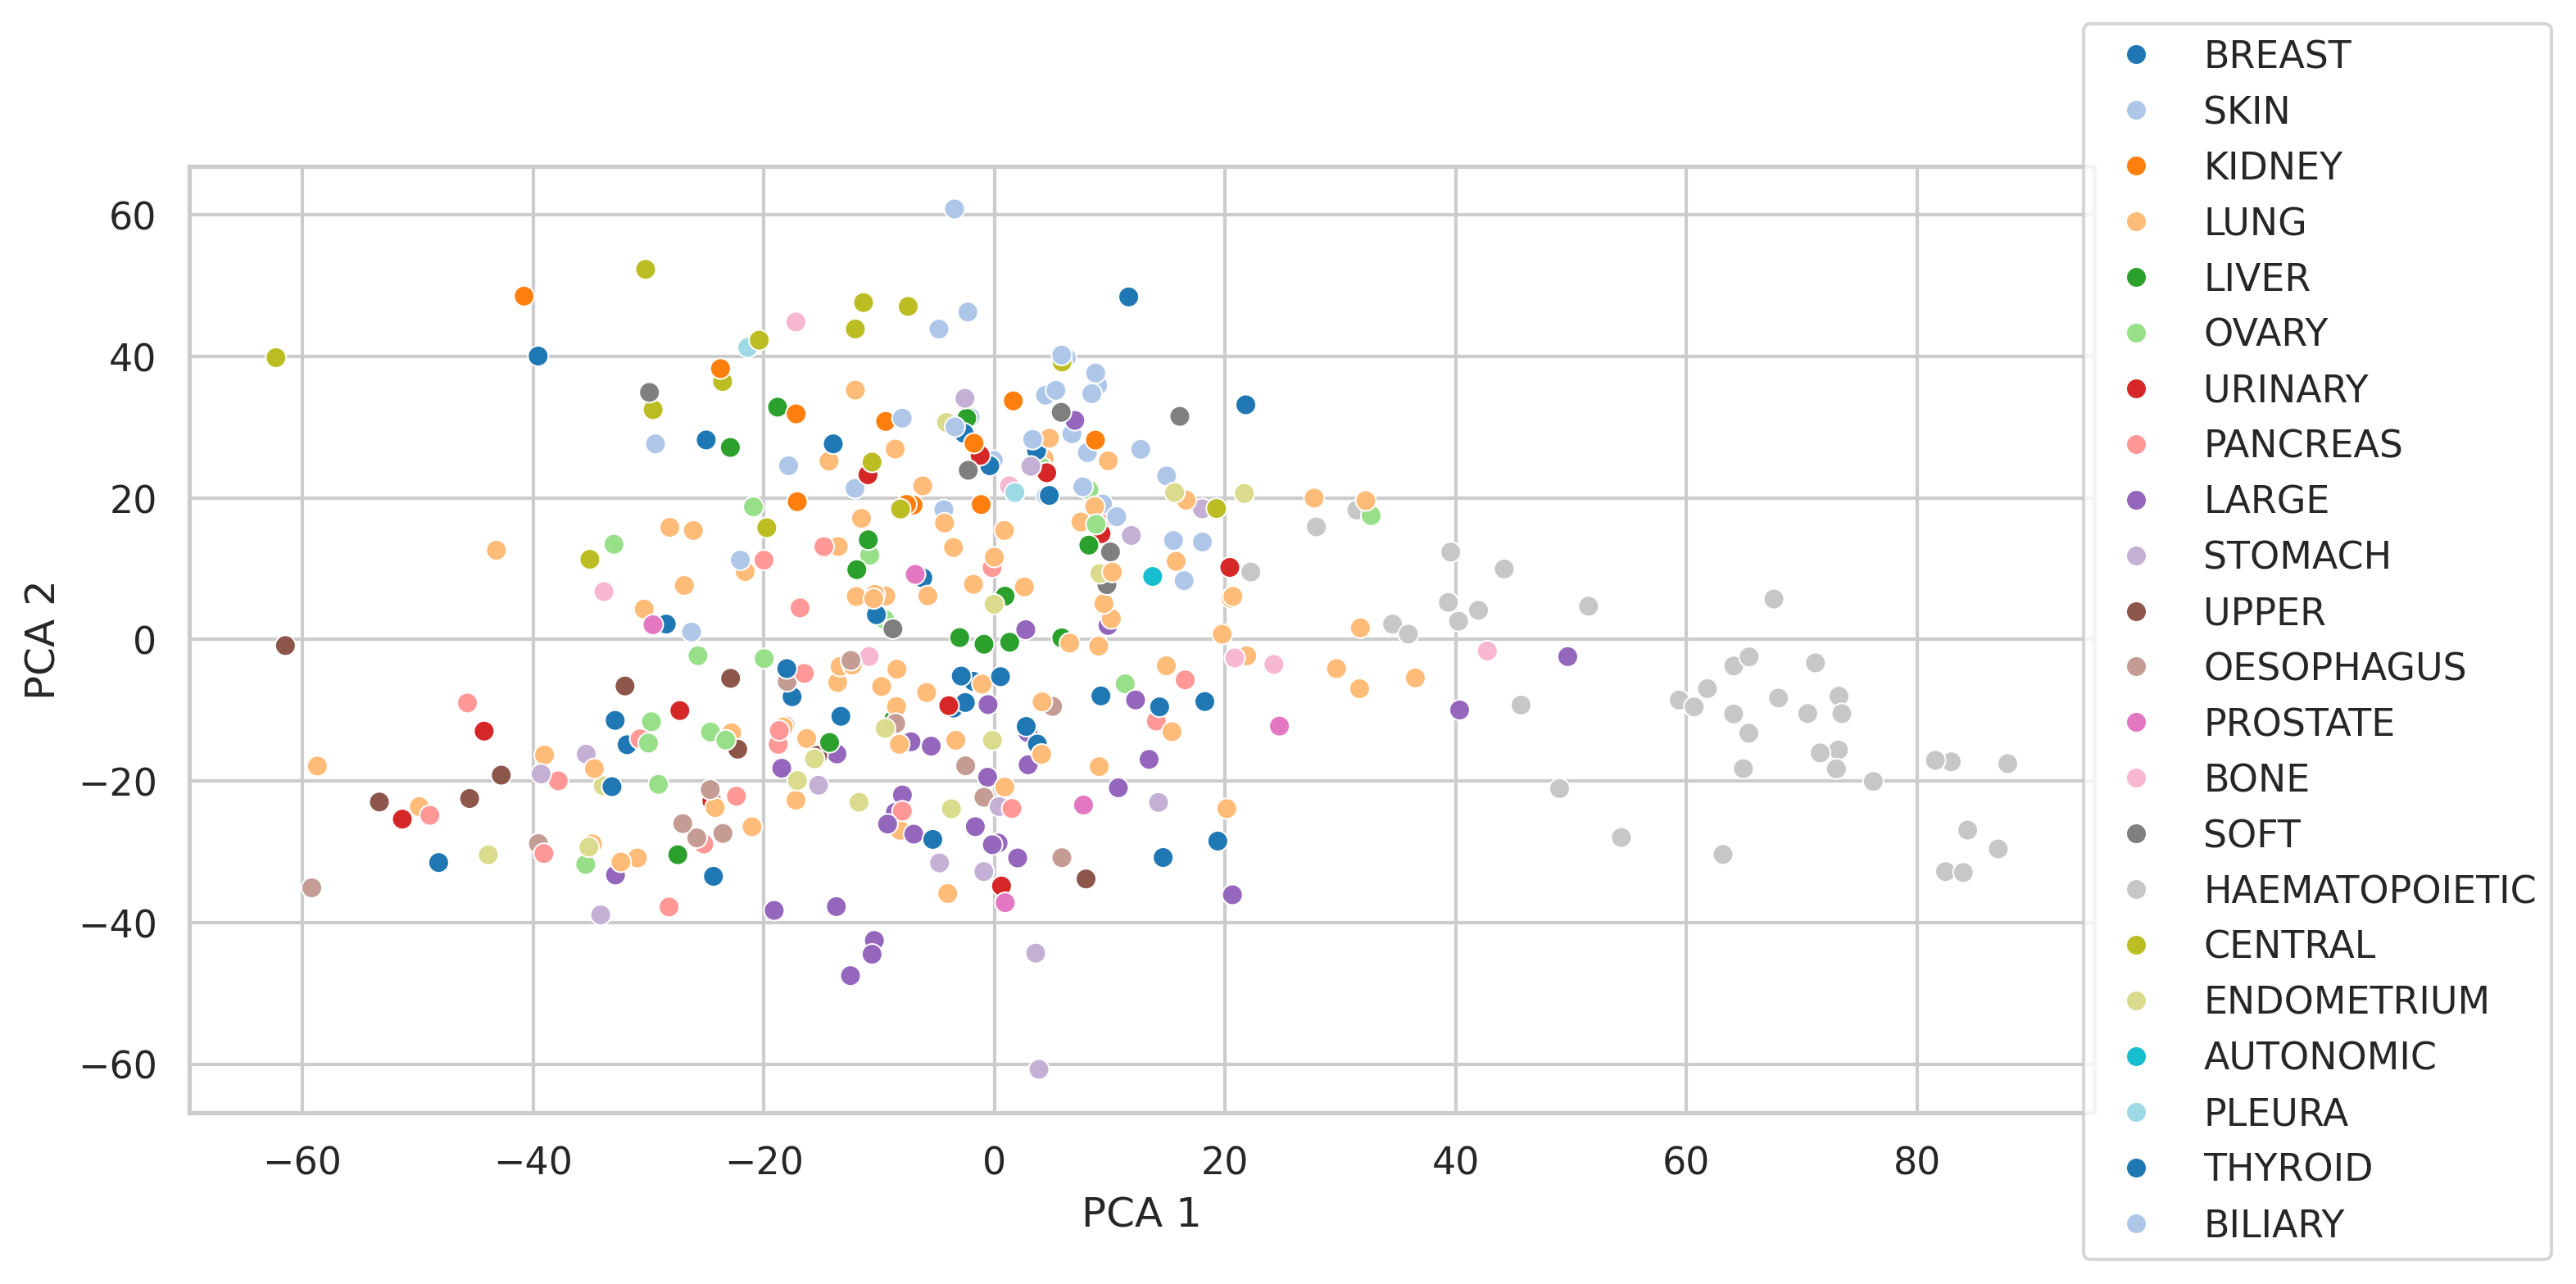

In [27]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)  # Set the number of components to 2 for 2D PCA
transformed_data = pca.fit_transform(np.nan_to_num(dfcopy.values, 0).T)

dfs=pd.DataFrame({'x':transformed_data[:,0], 'y':transformed_data[:,1], 'cellline':df.columns})
dfs['Set']=ccl_type
#dfs=dfs[dfs['Set'].isin(list(dfs.value_counts('Set').index)[:10

sns.scatterplot(data=dfs, x='x', y='y', hue='Set', palette='tab20')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.17))
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [29]:
df.to_pickle(f'{Path}/GIGY_data.pkl')

In [109]:
dfs[dfs['cellline']=='SW948']

,x,y,cellline,Set
84,10.743397,-20.958866,SW948,LARGE
143,-6.986321,-27.505399,SW948,LARGE


In [110]:
dfs[dfs['cellline']=='CAL120']

,x,y,cellline,Set
16,4.759437,20.365379,CAL120,BREAST
171,-13.968346,27.654382,CAL120,BREAST
